In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [59]:
df = pd.read_csv('../data/environmental_impact_data.csv')
df.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,41.84,68.83,338.27,93.18,104.96,216.85,57.15,28.66,58.02,287.70,74.87
1,38.46,72.14,353.67,120.44,72.86,233.87,46.07,36.61,92.69,322.34,43.70
2,54.97,60.23,324.93,114.66,72.64,221.37,34.13,30.88,81.90,329.35,57.47
3,56.35,71.60,202.88,127.56,75.76,129.26,47.93,24.88,76.20,300.33,21.75
4,54.00,65.76,292.23,80.19,63.19,239.81,56.24,39.24,88.57,327.12,48.77


In [60]:
df.shape

(100, 11)

In [61]:
df.describe()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,48.808000,70.729900,300.088900,102.005900,77.453800,202.344900,49.75010,30.085500,80.22250,294.236400,45.309100
std,8.784509,8.804049,49.082548,18.634315,15.582053,35.482795,9.40057,5.199462,10.18513,45.320703,21.458624
min,28.440000,51.870000,173.960000,50.250000,42.180000,113.550000,28.73000,16.270000,51.98000,103.880000,0.000000
25%,43.260000,65.392500,269.847500,90.840000,66.410000,181.335000,43.84500,27.102500,74.03250,265.042500,30.827500
50%,50.130000,69.500000,298.965000,102.965000,75.995000,204.720000,49.94000,29.600000,81.26000,300.220000,43.815000
75%,54.745000,76.310000,334.762500,114.600000,88.005000,226.825000,55.65250,33.937500,86.09000,321.282500,60.540000
max,70.460000,92.410000,402.730000,140.270000,121.530000,276.940000,70.27000,40.860000,105.30000,383.820000,100.000000


<Axes: >

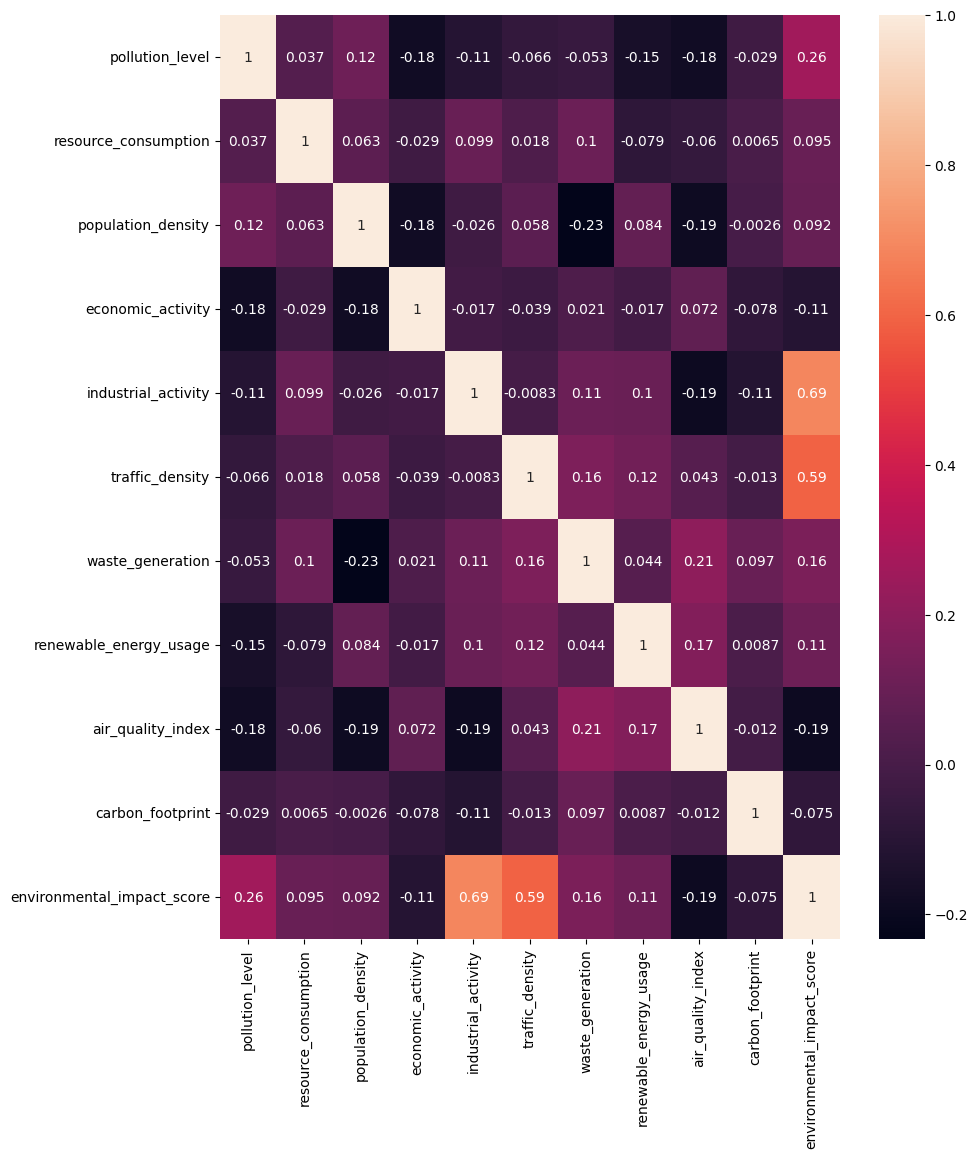

In [62]:
cm = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(cm,annot=True)

In [63]:
cm['environmental_impact_score']

pollution_level               0.258833
resource_consumption          0.095307
population_density            0.091759
economic_activity            -0.107769
industrial_activity           0.690698
traffic_density               0.594056
waste_generation              0.155242
renewable_energy_usage        0.112714
air_quality_index            -0.191543
carbon_footprint             -0.075185
environmental_impact_score    1.000000
Name: environmental_impact_score, dtype: float64

In [64]:
cm_df = abs(cm['environmental_impact_score'])
cm_df

pollution_level               0.258833
resource_consumption          0.095307
population_density            0.091759
economic_activity             0.107769
industrial_activity           0.690698
traffic_density               0.594056
waste_generation              0.155242
renewable_energy_usage        0.112714
air_quality_index             0.191543
carbon_footprint              0.075185
environmental_impact_score    1.000000
Name: environmental_impact_score, dtype: float64

In [65]:
selected_feature = cm_df[cm_df>0.25].index.drop('environmental_impact_score')
selected_feature

Index(['pollution_level', 'industrial_activity', 'traffic_density'], dtype='object')

In [66]:
x = df[selected_feature]
y = df['environmental_impact_score']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)

print(f'R2 - {round(r2*100,2)} and MSE - {mse}')

R2 - 97.02 and MSE - 11.44911468238552


In [67]:
df.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,41.84,68.83,338.27,93.18,104.96,216.85,57.15,28.66,58.02,287.70,74.87
1,38.46,72.14,353.67,120.44,72.86,233.87,46.07,36.61,92.69,322.34,43.70
2,54.97,60.23,324.93,114.66,72.64,221.37,34.13,30.88,81.90,329.35,57.47
3,56.35,71.60,202.88,127.56,75.76,129.26,47.93,24.88,76.20,300.33,21.75
4,54.00,65.76,292.23,80.19,63.19,239.81,56.24,39.24,88.57,327.12,48.77


In [68]:
x = df.drop('environmental_impact_score',axis=1)
y = df['environmental_impact_score']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
minmax = MinMaxScaler()
scale = minmax.fit_transform(df.drop(columns=['environmental_impact_score']))

df_scale = pd.DataFrame(scale,columns=df.columns[:-1])
df_scale['environmental_impact_score'] = df['environmental_impact_score']
df_scale.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,0.318896,0.418352,0.718232,0.476894,0.791178,0.632230,0.684160,0.503863,0.113278,0.656641,74.87
1,0.238458,0.500000,0.785549,0.779716,0.386641,0.736398,0.417429,0.827166,0.763503,0.780382,43.70
2,0.631366,0.206216,0.659920,0.715508,0.383869,0.659894,0.129995,0.594144,0.561140,0.805423,57.47
3,0.664208,0.486680,0.126415,0.858809,0.423188,0.096150,0.462205,0.350142,0.454239,0.701758,21.75
4,0.608282,0.342625,0.516982,0.332593,0.264776,0.772752,0.662253,0.934120,0.686234,0.797457,48.77


In [70]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['variance'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [71]:
x = df_scale.drop('environmental_impact_score',axis=1)
selected_feature = calculate_vif(x)
selected_feature

,variance,vif
0,pollution_level,5.791073
1,resource_consumption,5.676857
2,population_density,7.783071
3,economic_activity,7.470285
4,industrial_activity,6.037037
5,traffic_density,7.310719
6,waste_generation,7.114373
7,renewable_energy_usage,8.735315
8,air_quality_index,8.909886
9,carbon_footprint,14.231671


In [72]:
selected_feature = selected_feature[selected_feature['vif']<=8]['variance']
selected_feature

0         pollution_level
1    resource_consumption
2      population_density
3       economic_activity
4     industrial_activity
5         traffic_density
6        waste_generation
Name: variance, dtype: object

In [73]:
x = df[selected_feature]
y = df['environmental_impact_score']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)

print(f'R2 - {round(r2*100,2)} and MSE - {mse}')

R2 - 96.3 and MSE - 14.166472703956552
